In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('Iris.csv')
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


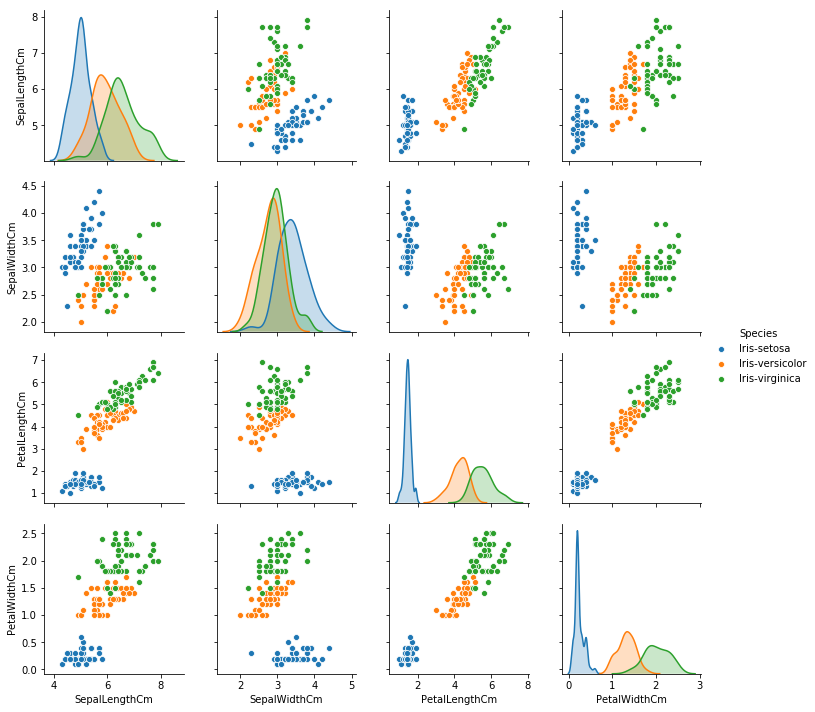

In [3]:
sns.pairplot(dataset.iloc[:,1:6],hue="Species")

In [0]:
#Splitting the data into training and test test
X = dataset.iloc[:,1:5].values
y = dataset.iloc[:,5].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values

X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [5]:
X_train.shape

(120, 4)

In [21]:
# Model
model = Sequential()

# first input layer with first hidden layer in a single statement
model.add(Dense(3, input_shape=(4,), activation='relu') )
# input_shape=(4,) means input_dim=4

# second hiden layer
model.add(Dense(4,activation='relu')) # 8 = no. of neurons in second hidden layer

# ouput layer
model.add(Dense(3,activation='softmax')) # 3 = no. of neurons in output layer as three categories of labels are there

# compile method receives three arguments: "an optimizer", "a loss function" and "a list of metrics"
model.compile(Adam(lr=0.04),'categorical_crossentropy', ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 3)                 15        
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 16        
_________________________________________________________________
dense_15 (Dense)             (None, 3)                 15        
Total params: 46
Trainable params: 46
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=300, validation_split=0.2)
y_pred = model.predict(X_test)

Train on 96 samples, validate on 24 samples
Epoch 1/300
96/96 [==============================] - 1s 6ms/step - loss: 0.9455 - acc: 0.4792 - val_loss: 1.0133 - val_acc: 0.2917
Epoch 2/300
96/96 [==============================] - 0s 98us/step - loss: 0.8565 - acc: 0.3854 - val_loss: 0.8730 - val_acc: 0.3333
Epoch 3/300
96/96 [==============================] - 0s 84us/step - loss: 0.7872 - acc: 0.3958 - val_loss: 0.8187 - val_acc: 0.5833
Epoch 4/300
96/96 [==============================] - 0s 100us/step - loss: 0.7157 - acc: 0.7396 - val_loss: 0.7464 - val_acc: 0.5833
Epoch 5/300
96/96 [==============================] - 0s 118us/step - loss: 0.6540 - acc: 0.7500 - val_loss: 0.6798 - val_acc: 0.6250
Epoch 6/300
96/96 [==============================] - 0s 79us/step - loss: 0.6013 - acc: 0.7500 - val_loss: 0.6399 - val_acc: 0.6250
Epoch 7/300
96/96 [==============================] - 0s 116us/step - loss: 0.5566 - acc: 0.7708 - val_loss: 0.5944 - val_acc: 0.7083
Epoch 8/300
96/96 [===========

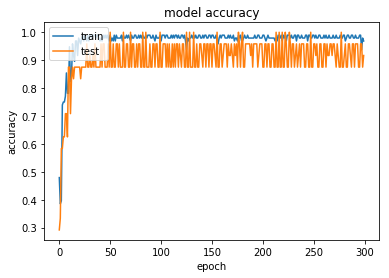

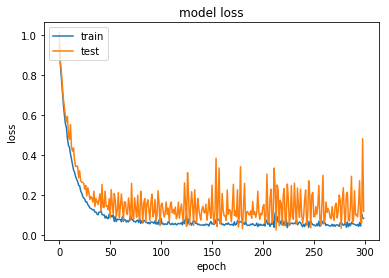

In [23]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()